# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: 
<br>1- Which station has the highest number arrivals and lowest number of departures? Which station has the highest number of departures and lowest number of arrivals?
            <br>2- Are the top busiests stations located in the same area/region of a city or more distributed around the city? 
            <br>3- How the weather conditions (rainy/sunny days) does affect the ridership? Which type of users is affected more
            subscribers or customers?


> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in, delimiter=',')
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        #Return the next row as Dict
        first_trip = next(trip_reader) 
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint (first_trip)
        
         
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip



City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    # Washington coverting from ms to min
    if city == 'Washington':
        duration_ms = float(datum['Duration (ms)'])
        duration = duration_ms / (1000 * 60)
    # NYC and Chicago converting from sec to min    
    else:
        duration_sec = float(datum['tripduration'])
        duration = duration_sec / 60
    
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    if city == 'NYC':
        #create datetime object from a string
        tripdate = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M:%S')
        
    else:
        if city == 'Washington':
            #create datetime object from a string
            tripdate = datetime.strptime(datum['Start date'], '%m/%d/%Y %H:%M')
        else:
            tripdate = datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M')
            
    month = tripdate.month
    hour = tripdate.hour
    #obtain a string representing as week day full name 
    day_of_week= tripdate.strftime('%A') 
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    if city == 'Washington':
        if datum['Member Type'] == 'Registered':
            user_type = 'Subscriber'
        elif datum['Member Type'] == 'Casual':
            user_type = 'Customer'
    else:
        user_type = datum['usertype']
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w', newline='') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in, delimiter = ',')

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point['duration'] = duration_in_mins(row,city)
            new_point['month'], new_point['hour'], new_point['day_of_week'] = time_of_trip(row,city)
            new_point['user_type'] = type_of_user(row,city)
            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            
            

In [7]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: 
           <br> __NYC__ has the highest number of trips __276798__ <br>
            __NYC__ has the highest proportion of trips made by subscribers: __88.83%__<br>
            __Chicago__ has the highest proportion of trips made by customers: __23.77%__

In [8]:
from collections import defaultdict #import defaultdict 

def number_of_trips(filenames):
    """
    This function reads in a list of files with trip data and 
    reports the number of trips made, 
    the proportion of trips made by Subscribers
    and the proportion of trips made by Customers for each city
    The output is a nested dict
    
            {'prop_customers': {'city1': xx,
                                'city2': xx,
                                'city3': x},
             'prop_subscribers': {'city1': xx,
                                  'city2': xx,
                                  'city3': xx},
             'total_trips': {'city1': xx,
                             'city2': xx,
                             'city3': xx}}
    """
    #defining a Defaultdict object
    #setting default_factory to dict
    #to create a nested dict
    dictall=defaultdict(dict)
    for filename in filenames:
        
        city = filename.split('-')[0].split('/')[-1]
        with open(filename, 'r') as f_in:
            # set up csv reader object
            reader = csv.DictReader(f_in)

            # initialize count variables
            n_subscribers = 0
            n_customers = 0

            # tally up ride types
            for row in reader:
                if row['user_type'] == 'Subscriber':
                    n_subscribers += 1
                else:
                    n_customers += 1

            # compute total number of rides
            n_total = n_subscribers + n_customers
            #Outside dict key=prop_subscribers
            dictall['prop_subscribers'][city] = (n_subscribers / n_total) * 100
            #Outside dict key=prop_customers
            dictall['prop_customers'][city] = (n_customers / n_total ) * 100
            #Outside dict key=total_trips
            dictall['total_trips'][city] = n_total   
    
    # return nested dict 
    return(dictall)
            

In [9]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##
#data_file = './examples/BayArea-Y3-Summary.csv'
# list of filemanes created by condense_data function
#used as argument to the number_of_trips function
filenames = ['./data/Chicago-2016-Summary.csv','./data/NYC-2016-Summary.csv','./data/Washington-2016-Summary.csv']
totaldict = (number_of_trips(filenames))
pprint(totaldict)

defaultdict(<class 'dict'>,
            {'prop_customers': {'Chicago': 23.774798630269924,
                                'NYC': 11.164098006488485,
                                'Washington': 21.971775774206193},
             'prop_subscribers': {'Chicago': 76.22520136973007,
                                  'NYC': 88.83590199351151,
                                  'Washington': 78.0282242257938},
             'total_trips': {'Chicago': 72131,
                             'NYC': 276798,
                             'Washington': 66326}})


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 
     <br>__Chicago__   : average trip duration is: __16.6 min__; proportion of rides more than 30 min: __8.3%__ <br>
     __NYC__       : average trip duration is: __15.8 min__; proportion of rides more than 30 min: __7.3%__ <br>
     __Washington__: average trip duration is: __18.9 min__; proportion of rides more than 30 min: __10.8%__ 


In [11]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##
def avg_trip_length(filename, usr_type=None):
    """
    Function that takes in as list of filenames
    and returns a tuple consisting of average 
    trip duration and proportions of rides
    more that 30 minutes, by default for all ridership.
    or depending on the optional argument usr_type that takes
    the values of Subscriber or Customer.
   
   """
        
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in) 
        avg_trip_length = 0
        #define empty lists
        total_duration = []
        more_than30 = []
        
        for row in reader:
            if usr_type is not None:
                if row['user_type'] == usr_type:
                    # append each row duration to total_duratin
                    # based on usr_type when supplied
                    total_duration.append(float(row['duration']))
            else:
                # append each row duration to total_duratin
                # total ridership
                total_duration.append(float(row['duration']))  
            
            if float(row['duration']) > 30:
                # append duration greater than 30 minutes
                # to more_than30 list
                more_than30.append(row['duration'])
           
            
        avg_trip_length = sum(total_duration)/len(total_duration)
        prop_trips_more_than30 = (len(more_than30)/len(total_duration))*100
        
        #return tuple
        return (avg_trip_length,prop_trips_more_than30)

In [12]:
filenames = ['./data/Chicago-2016-Summary.csv','./data/NYC-2016-Summary.csv',
             './data/Washington-2016-Summary.csv']
# print average trip duration and proportions of rides greater
# than 30 minutes for each city
for filename in filenames:
    city = filename.split('-')[0].split('/')[-1]
    print ("{0:10}: avg trip duration is: {1:.1f} min; prop of rides > than 30 min: {2:.1f}%"\
            .format(city,avg_trip_length(filename)[0],avg_trip_length(filename)[1]))  


Chicago   : avg trip duration is: 16.6 min; prop of rides > than 30 min: 8.3%
NYC       : avg trip duration is: 15.8 min; prop of rides > than 30 min: 7.3%
Washington: avg trip duration is: 18.9 min; prop of rides > than 30 min: 10.8%


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: 

<br> __Chicago__   : average trip duration by __Subscriber__: __12.1 min__; average trip duration by __Customer__: __31.0 min__

<br> On Average Customers take longer rides than Subscribers in Chicago.


In [13]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

## we can use the previous function trip_length in order to get the average
# Customer and average Subscriber trip duration, adding the argument Customer,Subscriber

filenames = ['./data/Chicago-2016-Summary.csv','./data/NYC-2016-Summary.csv',
            './data/Washington-2016-Summary.csv']
for filename in filenames:
    city = filename.split('-')[0].split('/')[-1]
    print ("{0:10}: avg trip duration for Subscribers: {1:.1f} min;\
    avg trip duration for Customers: {2:.1f} min"\
    .format(city,avg_trip_length(filename,'Subscriber')[0],avg_trip_length(filename,'Customer')[0]))  

Chicago   : avg trip duration for Subscribers: 12.1 min;    avg trip duration for Customers: 31.0 min
NYC       : avg trip duration for Subscribers: 13.7 min;    avg trip duration for Customers: 33.0 min
Washington: avg trip duration for Subscribers: 12.5 min;    avg trip duration for Customers: 41.7 min


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

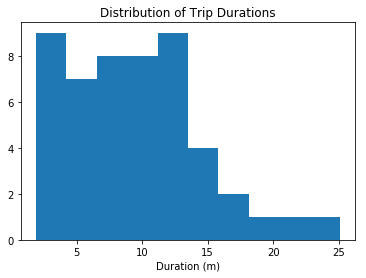

In [14]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [15]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
## We can re-use the function avg_trip_length() and modify to return a 
## a list of trips distribution for Subscribers,Customers, and total riderhip

def trip_duration(filename, usr_type=None):
    
    
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in) 
        avg_trip_length= 0
        total_duration=[]
        
        for row in reader:
            if usr_type is not None:
                if row['user_type'] == usr_type:
                    total_duration.append(float(row['duration']))
            else:
                total_duration.append(float(row['duration']))  
           
        return total_duration
    

# setting filename to Chicago-2016-Summary.csv    
filename = './data/Chicago-2016-Summary.csv'
data_Chicago = trip_duration(filename)




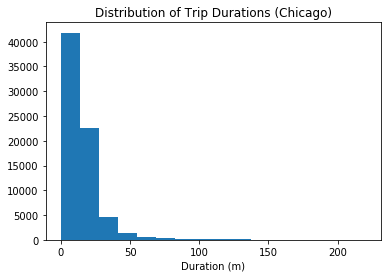

In [16]:
#create a histogram from list obtained from the previous cell
#setting x-axis duration range from 0 to 220 min
#bins number set to 16 
%matplotlib inline
plt.hist(data_Chicago, range=(0,220), bins=16)
plt.title('Distribution of Trip Durations (Chicago)')
plt.xlabel('Duration (m)')
plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**:
<br> __Chicago__
<br> The highest peak (mode) for Subscribers' Trip duration distribution is around 18750 between 5 and 10 mintues interval
<br> The highest peak (mode) for Customers' Trip duration distribution is around 3000 between 20 and 25 minutes interval

<br> The shape of the Subscribers' trip duration distribution is unimodal, right-skewed.
<br> The shape of the Customers' trip duration distribution is also unimodal, right-skewed.

In [17]:
## Use this and additional cells to answer Question 5. ##
#Chicago Trip times for Subscribers and Customers
def plothist(data, usr_type):
    """
    Function that takes trip times as list
    and usr_type and plot the distribution
    
    """
    plt.hist(data, range=(0,75), bins=15)
    plt.title('Distribution of Trip Durations by ' + usr_type + ' (Chicago)')
    plt.xlabel('Duration (m)')
    plt.grid(True)
    plt.show()


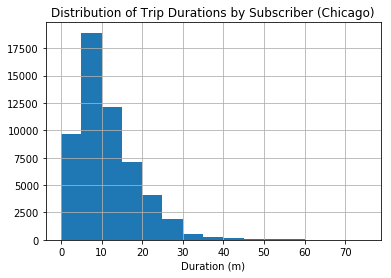

In [18]:
#Subscribers trip duration distribution

%matplotlib inline
plothist(trip_duration('./data/Chicago-2016-Summary.csv', 'Subscriber'),'Subscriber')


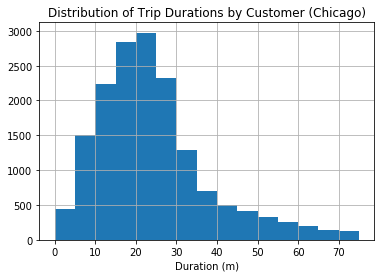

In [19]:
#Customers trip duration distribution
%matplotlib inline
plothist(trip_duration('./data/Chicago-2016-Summary.csv', 'Customer'),'Customer')

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: 
     <br> __Question chosen__:
     <br> - How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
     
     1. How does ridership differ by month or season?
     
     The ridership steadily starts to climb from January to April to reach less than 5000 trips (less than the Average total   trips per month). 
     Then it dramatically rises to reach it highest values in June and July with the peak in July of 
     more than 10000 (Above the Average total trips per month) trips and starts to decrease from August through  September,October and November to reach it lowest values in December less than 2000 trips.
       
     The monthly ridership follows a bell shaped trend (referring to output of cell 91).
     
     2. Which month / season has the highest ridership?
     
       JULY is the month with highest ridership. While SUMMER is the season with the highest ridership.
       
    3. Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
    
      Throughout the year both Subscriber trips and Customers trip follow the same trend.
      But the mumber of trips taken by customers drops signifincantly during winter season compared to the number
      of Subscriber trips. 
      From the total number of trips in Winter season, the ratio of Subscriber trips is around
      94% and around  6% for Customer trips. We can look at January and we can notice the ratio of Subscriber trips
      to Customer trips is 30:1.
      
      While during the Spring season, the ratio of Subscriber trips drop to around 77% of the total trips
      while the ratio of the Customer trips increase to around 23% from the total trips taken. 
      
      In the Summer season, the ratio of Customer trips increases further to around 29% from the total trips.
      A particular month to look at is July where the ratio of subscriber trips to Customer trips is 2:1
      
      and finally the Customer trips drop back to 22%  of the total trips taken during the Fall season.
      
__Conclusion__ 
     
 <br> Overall the number of bike trips in Chicago is affected by Weather Changes from Season to another.
 <br> And the increase in the number of Customer trips compared to Subscriber trips during Summer can be 
 attributed to the increase in the number of tourists/travellers visting Chicago during that periods of the year.
 
 
 
     
       
       
       

In [20]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.  ##
# I can re-use the number_of_trips function to answer question 

from collections import OrderedDict # importing OrderedDict from collections 

def num_trips_by_month(filename, usr_type=None):
    
    """
    
    This function reads in a file with trip data and takes 
    and reports the number of trips made 
    by subscribers, customers, and total overall per month
    based on an optional argument  usr_type(default total)
    and return a sorted OrderedDict.
    
    """
    # define empty dictionary
    ridership_per_month={}
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)

        for row in reader:
            if usr_type is not None:
                if row['user_type'] == usr_type :
                    #dict with key = month (1,2,3,4,etc...)
                    #and value number of ridership per month
                    #e.g {1:xxxx, 2:xxx, 3:xxxxx}
                    # for Subscribers or Customers
                    ridership_per_month[int(row['month'])] = ridership_per_month.get(int(row['month']), 0) + 1
            else:
                    #for all ridership          
                ridership_per_month[int(row['month'])] = ridership_per_month.get(int(row['month']), 0) + 1
    
    # Return sorted Oredered dict by keys with key=month and value=number ridership per month           
    return OrderedDict(sorted(ridership_per_month.items()))
     


In [21]:
# Bar plot ridership_per_month

def plotbar_ridership(dict_data, city, usr_type=None):
    
    plt.bar(dict_data.keys(), dict_data.values())
    if usr_type is not None:
        plt.title( usr_type + ' per month ('+ city +')')
    else:
        plt.title( 'Total ridership per month ('+ city +')')
    plt.xlabel('Month')
    plt.show()

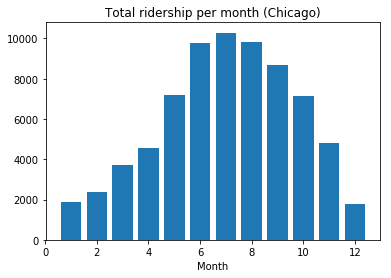

In [22]:
# Chicago total ridership by month
total_ridership_chicago = num_trips_by_month('./data/Chicago-2016-Summary.csv')
plotbar_ridership(total_ridership_chicago, 'Chicago')

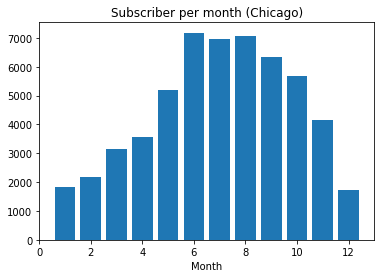

In [23]:
# Chicago Subscribers distribution by month
subscriber_chicago  =num_trips_by_month('./data/Chicago-2016-Summary.csv','Subscriber')
plotbar_ridership(subscriber_chicago, 'Chicago', 'Subscriber')

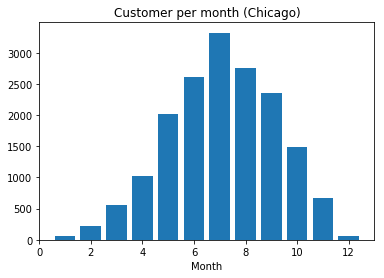

In [24]:
# Chicago Subscribers distribution by month
customer_chicago = num_trips_by_month('./data/Chicago-2016-Summary.csv','Customer')
plotbar_ridership(customer_chicago, 'Chicago', 'Customer')

In [25]:
# compute Average number of total, subscriber, customer 
# trips per month for Chicago

def avg_by_month(data_month):
    avg = sum(data_month.values())/len(data_month)
    return avg
    
print ('Chicago Customer trips by month is: {0:.2f}'.format(avg_by_month(customer_chicago)))
print ('Chicago Subscriber trips by month is: {0:.2f}'.format(avg_by_month(subscriber_chicago)))
print ('Chicago total trips by month is: {0:.2f}'.format(avg_by_month(total_ridership_chicago)))

Chicago Customer trips by month is: 1429.08
Chicago Subscriber trips by month is: 4581.83
Chicago total trips by month is: 6010.92


In [26]:
# print the month with the higher ridership
# Reference : https://docs.python.org/3.1/library/collections.html#collections.OrderedDict
from collections import OrderedDict # using OrderedDict

#Sort total_ridership dict in descending order based on the dictionary Value (number of ridership)
dict_ridership = OrderedDict(sorted(total_ridership_chicago.items(), reverse=True, key=lambda t: t[1]))

#Convert Dict to list
#Get the first tuple (month,ridership) from the sorted dict_ridership  
#having the highest ridership
month,ridership = list(dict_ridership.items())[0]

#print the month (formatted as full name) and the total ridership 
print ('{0} is the month with the highest ridership {1}'\
       .format(datetime.strptime(str(month), '%m').strftime('%B'),ridership))

July is the month with the highest ridership 10286


In [27]:
def proportion_users(data_sub, data_cust, usr_type):
    """
      This function takes 2 dictionaries
      customers per month and subscribers per month 
      and the user_type and returns a new dictionary of 
      proportions of either customers or subscribers 
      from the total ridership per month 
      depending on usr_type 
      
    """
    
    percentage = {}
    for key in data_sub.keys():
        
        if usr_type == 'Subscriber':
            #key = month (1,2,3,4,5,etc)
            #percentage of Subscribers from the total ridership
            percentage[key] = float(data_sub[key])/(data_sub[key] + data_cust[key])*100
            
        else:
            #percentage of Customers from the total ridership
            percentage[key] = float(data_cust[key])/(data_sub[key] + data_cust[key])*100
            
    return (percentage)



In [31]:
#Get ridership per season
#Reference: https://www.timeanddate.com/calendar/aboutseasons.html

def ridership_per_season(ridership_per_month):
    
    """
     
     Take a dictionary ridership per month
     and return dictionary of ridership per season
     
     {'Winter':xxxx, 
      'Spring':xxxx,
      'Summer':xxxx
      'Fall':xxx}
      
     """
    #Defining defaultdict object
    #setting default_factory to int
    ridership_per_season = defaultdict(int)
    for key in ridership_per_month:
        if key in (12,1,2):
            ridership_per_season['Winter'] += ridership_per_month[key]
        elif key in (3,4,5):
            ridership_per_season['Spring'] += ridership_per_month[key]
        elif key in (6,7,8):
             ridership_per_season['Summer'] += ridership_per_month[key]
        else:
            ridership_per_season['Fall'] += ridership_per_month[key]
    
    return ridership_per_season

    

In [28]:
##bar plot Subscriber vs Customers
## Stacked Bar plot proportion of subscribers 
## vs proportions of Customers

##References##

##https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/categorical_variables.html
#https://matplotlib.org/gallery/statistics/barchart_demo.html
#https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/barh.html

import numpy as np # import numpy library

def multibar(filename, city, month=True):
    
    """
    This Function takes in the filename report and the city
    as well as the month as boolean optional argument
    and by default plots 2 charts:
        1- bar chart for subscribers trips vs customers' trips
         by month 
        2- a stacked bar chart prop sub trips vs prop customers'
        trips by month
        
    if month = False, plots the same but by season 
        
    """
    
    
    # get total ridership by month
    total_per_month = num_trips_by_month(filename)
    # get customers' trips by month
    customer_per_month = num_trips_by_month(filename,'Customer')
    # get subscribers' trips by month
    subscriber_per_month = num_trips_by_month(filename,'Subscriber')
    
   
    if month:
        
        # set group and index accordingly for x-axis
        group = ('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 
                 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec')
        index = np.arange(len(group))
        
        total = total_per_month
        customer = customer_per_month
        subscriber = subscriber_per_month
        
    else:
        
        # get total ridership by season
        total = ridership_per_season(total_per_month)
        # get customers' trips by season
        customer = ridership_per_season(customer_per_month)
        # get subscribers' trips by season
        subscriber = ridership_per_season(subscriber_per_month)
        
        # set group and index accordingly for x-axis
        group = ('Winter', 'Spring', 'Summer', 'Fall' )
        index = np.arange(len(group))
                         
   
    # get proportions total, subscribers and customers
    percentage_sub = proportion_users(subscriber,customer,'Subscriber')
    percentage_cust = proportion_users(subscriber,customer,'Customer')
    total_ridership = total
    
    # using suplot to have 2 charts at the same time
    fig,ax = plt.subplots(1,2, figsize=(15,5))
  
   
    # first chart customers trips vs subscribers trips
    ax[0].bar(index, list(customer.values()), 0.35, color='r', label='Subscribers')
    ax[0].bar(index+0.35,list(subscriber.values()), 0.35, color='b', label='Customers')
    ax[0].plot(index,list(total_ridership.values()), linewidth=4, label='total')
    ax[0].set_xlabel('Year - 2016')
    ax[0].set_ylabel('trips')
    ax[0].set_xticks(index + 0.35/2)
    ax[0].set_xticklabels(group)
    ax[0].legend(loc=1)
    ax[0].set_title('Subscribers trips vs Customers trips (' + city +')')
   
    # second chart prop of customers trips vs prop of subscribers trips
    ax[1].bar(index,percentage_sub.values(), \
                color='b',width=0.5, label='Subscribers')
    ax[1].bar(index, percentage_cust.values(), color= 'r',width=0.5, label='Customers')
    ax[1].set_xlabel('Year - 2016')
    ax[1].set_xticks(index)
    ax[1].set_xticklabels(group)
    ax[1].set_ylabel('percentage of trips')
    ax[1].legend(loc=0)
    ax[1].set_title('Subscribers trips vs Customers trips (' + city +')')
    
    # using the ggplot style
    plt.style.use('ggplot')
    # to fit in both charts
    fig.tight_layout()

 


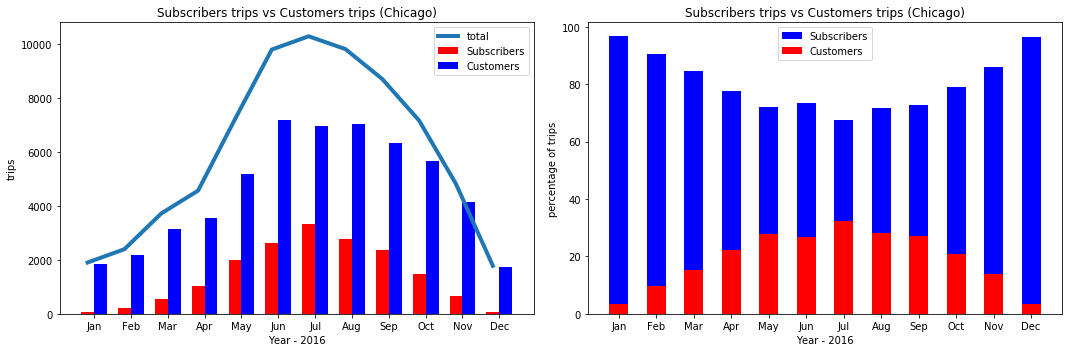

In [29]:
# charts by month
filename = './data/Chicago-2016-Summary.csv'
multibar(filename,'Chicago')


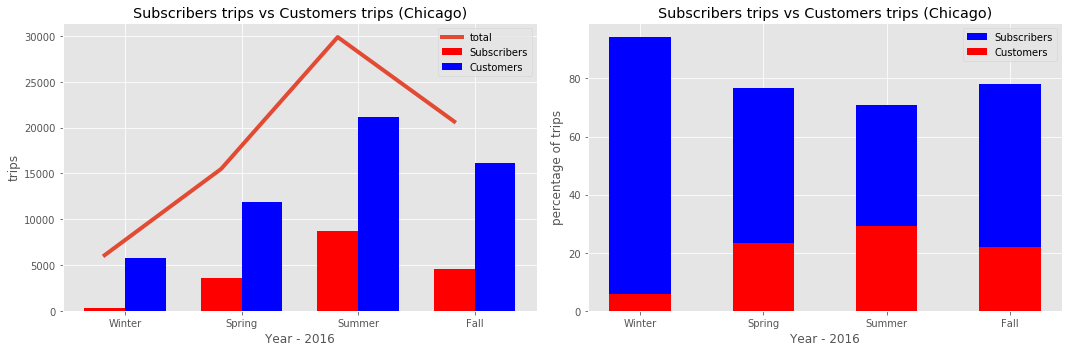

In [32]:
# charts by season 
multibar(filename,'Chicago', month=False)


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: 
 <br> __Impact of the messaging applications and Internet on the traditional Mobile SMS__
 <br> -How the rise of messaging applications (availability of internet) and technologies like WhatsApp have impacted the traditional mobile SMS traffic over the years? 
 <br>-Did that affect the revenue of the Mobile Telecom operators from SMS?
 <br>-How much of the market share did the traditional SMS loose to the messaging Applications over the years?
  

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

__References:__
<br> https://docs.python.org/3/library/collections.html
<br> https://docs.python.org/3.1/library/collections.html#collections.OrderedDict
<br> https://www.timeanddate.com/calendar/aboutseasons.html
<br> https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/categorical_variables.html
<br> https://matplotlib.org/gallery/statistics/barchart_demo.html
<br> https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/barh.html

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0